In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import random
import numpy as np

import hashlib
import pickle
import time

from glob import glob
import os, sys
from collections import defaultdict
from tqdm import tqdm
from pandas.core.frame import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import gc

In [111]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
# model_path = "./model/model_hash__64_4096_2048_2_0.0001.torchsave.pt"
# model = torch.load(model_path)


In [112]:
class GreedyHashLoss(torch.nn.Module):
    def __init__(self, bit, alpha=1):
        super(GreedyHashLoss, self).__init__()
        self.fc = torch.nn.Linear(bit, 602, bias=False).to(device)
        self.criterion = torch.nn.CrossEntropyLoss().to(device)
        self.alpha = alpha

    def forward(self, outputs, y, feature):
#        print(outputs)
#       print(y)
#       print(feature)
        loss1 = self.criterion(outputs, y)
        loss2 = self.alpha * (feature.abs() - 1).pow(3).abs().mean()
#       print(feature.abs() - 1)
#       print(loss1)
#print(loss2)
        return loss1 + loss2

    class Hash(torch.autograd.Function):
        @staticmethod
        def forward(ctx, input):
            # ctx.save_for_backward(input)
            return input.sign()

        @staticmethod
        def backward(ctx, grad_output):
            # input,  = ctx.saved_tensors
            # grad_output = grad_output.data
            return grad_output

In [ ]:
_which_dense = 2
_hashSize = 128
_denseSize1 = 4096
_denseSize2 = 2048

# Read data
from glob import glob
path = '../../../my_deepsketch/clustering/input_data_partial_0_1_100/'

original_data = glob(os.path.join(path, '*/*'))

numCluster = len(original_data) // 3

# hashlayer
class RevisedNetwork(torch.nn.Module):
    def __init__(self):
        super(RevisedNetwork, self).__init__()

        self.conv_layers = []
        self.layers = []


        # The structure is copied from train_baseline.py
        self.conv_layers.append(nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1, bias=True)) 
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(8))
        self.conv_layers.append(nn.MaxPool1d(2)) 

        self.conv_layers.append(nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(16))
        self.conv_layers.append(nn.MaxPool1d(2)) 

        self.conv_layers.append(nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        # # We add
        # self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        # self.conv_layers.append(nn.ReLU()) 
        # self.conv_layers.append(nn.BatchNorm1d(32))
        # self.conv_layers.append(nn.MaxPool1d(2)) 
        
        # self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        # self.conv_layers.append(nn.ReLU()) 
        # self.conv_layers.append(nn.BatchNorm1d(32))
        # self.conv_layers.append(nn.MaxPool1d(2)) 
        
        # self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        # self.conv_layers.append(nn.ReLU()) 
        # self.conv_layers.append(nn.BatchNorm1d(32))
        # self.conv_layers.append(nn.MaxPool1d(2)) 
        
        # self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        # self.conv_layers.append(nn.ReLU()) 
        # self.conv_layers.append(nn.BatchNorm1d(32))
        # self.conv_layers.append(nn.MaxPool1d(2)) 

        # self.layers.append(nn.Linear(512*256, _denseSize1))
        # self.layers.append(nn.ReLU()) 
        # self.layers.append(nn.Dropout(p=0.5))
        # We add
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
        
        self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True))
        self.conv_layers.append(nn.ReLU()) 
        self.conv_layers.append(nn.BatchNorm1d(32))
        self.conv_layers.append(nn.MaxPool1d(2)) 
     
        # # self.conv_layers.append(nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True))
        # # self.conv_layers.append(nn.ReLU()) 
        # # self.conv_layers.append(nn.BatchNorm1d(64))
        # # self.conv_layers.append(nn.MaxPool1d(2)) 
        
        # # self.conv_layers.append(nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=True))
        # # self.conv_layers.append(nn.ReLU()) 
        # # self.conv_layers.append(nn.BatchNorm1d(128))
        # # self.conv_layers.append(nn.MaxPool1d(2)) 

        self.layers.append(nn.Linear(512*32, _denseSize1))
        self.layers.append(nn.ReLU()) 
        self.layers.append(nn.Dropout(p=0.5))
        # self.layers.append(nn.Linear(4096 * 4, _denseSize1))
        # self.layers.append(nn.ReLU()) 
        # self.layers.append(nn.Dropout(p=0.5))

        last_denseSize = _denseSize1
        if _denseSize2 > 0:
            self.layers.append(nn.Linear(_denseSize1, _denseSize2))
            self.layers.append(nn.ReLU()) 
            self.layers.append(nn.Dropout(p=0.5))
            last_denseSize = _denseSize2

        self.fc = nn.Linear(last_denseSize, numCluster, bias=False)

        self.conv_layers = nn.ModuleList(self.conv_layers)
        self.layers = nn.ModuleList(self.layers)


    def forward(self, x):
        x = x.unsqueeze(dim=1)
        for l in self.conv_layers:
            x = l(x)

        x = x.view(x.shape[0], -1)
        for l in self.layers:
            x = l(x)
        x = self.fc(x)
        output = F.log_softmax(x, dim=1)
        return output


class HashNetwork(torch.nn.Module):
    def __init__(self, revNet):
        super(HashNetwork, self).__init__()

        self.conv_layers = []
        self.layers = []

        self.conv_layers = revNet.conv_layers
        self.layers = revNet.layers

        last_denseSize = _denseSize1

        if _denseSize2 > 0:
            if _which_dense == 2:
                last_denseSize = _denseSize2

        self.fc_plus = nn.Linear(last_denseSize, _hashSize)
        self.fc = nn.Linear(_hashSize, numCluster, bias=False)


    def forward(self, x):
        x = x.unsqueeze(dim=1)
        for l in self.conv_layers:
            x = l(x)

        x = x.view(x.shape[0], -1)

        if _which_dense == 2:
            for l in self.layers:
                x = l(x)
        else:
            x = self.layers[0](x)

        x = self.fc_plus(x)
        code = GreedyHashLoss.Hash.apply(x)
        output = self.fc(code)

        return output, x, code
        

# Load basemodel
basemodel_filename = "./training/model/model_data.torchsave" # The path of our first model

print("Base Model: " + basemodel_filename)
basemodel = RevisedNetwork()
basemodel.load_state_dict(torch.load(basemodel_filename,map_location=torch.device(device)))

hidden_model = HashNetwork(basemodel)

hidden_model_path = './training/model/model_hash.torchsave' # The path of our second model
hidden_model.load_state_dict(torch.load(hidden_model_path,map_location=torch.device(device)))
hidden_model= hidden_model.to(device)

hidden_model.eval()

In [114]:
def find_files(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            yield os.path.join(root, file)
# print(get_rabin_min_max_hash('./0_112596.bin'))
# print(get_rabin_min_max_hash('./0_112597.bin'))
# print(get_rabin_min_max_hash('../clustering/input_data/0/0_112598.bin'))
# file_path = '../clustering/input_data/'
fps = [[], [], []]
# files = os.listdir('../clustering/input_data/')

directory_to_search = './partial_data_dal09_data_10000_512KiB/' # read your dataset folder, the folder contains the chunks
all_files = list(find_files(directory_to_search))
print(len(all_files))
print('ok')

11649
ok


In [115]:
fp_data=DataFrame(fps)
fp_data = fp_data.T
fp_data.rename(columns={0:'file name', 1:'min fp', 2:'max fp'},inplace=True)
print(fp_data)
fp_data.describe()

Empty DataFrame
Columns: [file name, min fp, max fp]
Index: []


,file name,min fp,max fp
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


# Semantic hash

In [116]:
def get_hash_from_hidden_model(filename):
    file = open(filename, 'rb')
    data = file.read()
    file.close()
    data = [int(d)for d in data]
    data_tensor = torch.tensor(data, dtype=torch.float32)
    data_tensor = (data_tensor-128)/128.0
    data_tensor = data_tensor.unsqueeze(0)
    # print(data_tensor)
    data_tensor = data_tensor.to(device)
    
    with torch.no_grad():
        outputs, feature, _ = hidden_model(data_tensor)
    
    del data
    del data_tensor
    del outputs
    gc.collect()
    
    ret = _[0].to('cpu')
    
    del _
    gc.collect()
    
    return ret

In [117]:
torch.cuda.empty_cache()
def get_hash_from_hidden_model(filenames):
    batch_data = []

    # read all files for preprocessing
    for filename in filenames:
        file = open(filename, 'rb')
        data = file.read()
        file.close()
        data = [int(d) for d in data]
        data_tensor = torch.tensor(data, dtype=torch.float32)
        data_tensor = (data_tensor - 128) / 128.0
        data_tensor = data_tensor.unsqueeze(0)
        batch_data.append(data_tensor)

    batch_data_tensor = torch.cat(batch_data, dim=0).to(device)

    # inference
    with torch.no_grad():
        outputs, feature, _ = hidden_model(batch_data_tensor)

    results = [item.to('cpu') for item in _]

    # clean the memory
    del batch_data
    del batch_data_tensor
    del outputs
    del feature
    torch.cuda.empty_cache()
    gc.collect()

    return results


# directory_to_search = '/home/gpu2/sunt/Docker_dedup/data/Docker/uncompressed_data_264GB_512KiB/'
batch_size = 400
all_files = list(find_files(directory_to_search))
sm_hash = [[], []]
cnt = 0

for i in range(0, len(all_files), batch_size):
    batch_files = all_files[i:i+batch_size]
    batch_results = get_hash_from_hidden_model(batch_files)

    for file, fp in zip(batch_files, batch_results):
        sm_hash[0].append(file)
        sm_hash[1].append(fp)
        cnt += 1
        print(cnt, end='\r')
        
    # clean the cuda memory
    torch.cuda.empty_cache()
    gc.collect()

sm_hash = DataFrame(sm_hash).T
sm_hash.rename(columns={0: 'file name', 1: 'semantic hash'}, inplace=True)

In [8]:
sm_hash.to_pickle('./sm_hash(partial_data_ubuntu).pkl')

In [9]:
sm_hash.to_csv('./sm_hash(uncompressed_data_264GB).csv')

In [118]:
sm_hash.head()

,file name,semantic hash
0,./partial_data_dal09_data_10000_512KiB/56_65ab...,"[tensor(1.), tensor(-1.), tensor(-1.), tensor(..."
1,./partial_data_dal09_data_10000_512KiB/56_5613...,"[tensor(-1.), tensor(-1.), tensor(1.), tensor(..."
2,./partial_data_dal09_data_10000_512KiB/56_1cb0...,"[tensor(-1.), tensor(-1.), tensor(1.), tensor(..."
3,./partial_data_dal09_data_10000_512KiB/56_1f5b...,"[tensor(1.), tensor(-1.), tensor(-1.), tensor(..."
4,./partial_data_dal09_data_10000_512KiB/56_ef03...,"[tensor(1.), tensor(-1.), tensor(1.), tensor(-..."


# DBSCAN clustering

In [119]:
# sm_hash = pd.read_pickle('./sm_hash(partial_data_ubuntu).pkl')

def convert_and_to_numpy(tensor):
    # if tensors are in the GPU, transfer them to the CPU
    if tensor.is_cuda:
        tensor = tensor.cpu()
    # transfer -1 and 1 to the 0 and 1
    converted_tensor = (tensor + 1) / 2
    # transfer the tensor into NumPy arrays
    return converted_tensor


sm_hash['semantic hash'] = sm_hash['semantic hash'].apply(convert_and_to_numpy)

print(sm_hash.iloc[0].at['semantic hash'])

tensor([1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 0.])


In [106]:
import hdbscan
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import hamming
from sklearn.metrics import pairwise_distances

hash_values = sm_hash['semantic hash'].apply(lambda x: x.detach().numpy())
hash_values = list(hash_values)


## calculate hamming distance

In [120]:
hamming_dist = pdist(hash_values, metric='hamming')
hamming_dist_matrix = squareform(hamming_dist)

In [121]:
hamming_dist_matrix

array([[0.       , 0.171875 , 0.5390625, ..., 0.125    , 0.5234375,
        0.21875  ],
       [0.171875 , 0.       , 0.4453125, ..., 0.046875 , 0.4140625,
        0.109375 ],
       [0.5390625, 0.4453125, 0.       , ..., 0.4453125, 0.046875 ,
        0.3671875],
       ...,
       [0.125    , 0.046875 , 0.4453125, ..., 0.       , 0.4296875,
        0.109375 ],
       [0.5234375, 0.4140625, 0.046875 , ..., 0.4296875, 0.       ,
        0.3515625],
       [0.21875  , 0.109375 , 0.3671875, ..., 0.109375 , 0.3515625,
        0.       ]])

In [122]:
rounded_hamming_dist_matrix = hamming_dist_matrix.round(decimals=2).astype(np.float16)
type(rounded_hamming_dist_matrix[0][0])

numpy.float16

In [88]:
np.save('rounded_hamming_dist_matrix(partial_couchbase).npy', rounded_hamming_dist_matrix)

In [123]:
dbscan = DBSCAN(metric='precomputed', eps=0.03, min_samples=1, n_jobs=-1)
dbscan.fit(rounded_hamming_dist_matrix)
# 

# obtain the labels
sm_hash['cluster'] = dbscan.labels_

print(sm_hash['cluster'])

0        0
1        0
2        0
3        0
4        0
        ..
11644    0
11645    0
11646    0
11647    0
11648    0
Name: cluster, Length: 11649, dtype: int64


In [124]:
sm_hash['cluster'].value_counts()

cluster
0      10062
40        21
4         21
25        21
77        20
       ...  
468        1
466        1
465        1
464        1
474        1
Name: count, Length: 1193, dtype: int64

In [3]:
sm_hash = pd.read_pickle('./sm_hash(partial_data_ubuntu)_cluster_分片.pkl')

In [125]:
sm_hash['cluster'].value_counts()

cluster
0      10062
40        21
4         21
25        21
77        20
       ...  
468        1
466        1
465        1
464        1
474        1
Name: count, Length: 1193, dtype: int64

In [93]:
cluster_num = len(sm_hash['cluster'].value_counts())
cluster_num

577

cluster
3      5115
2      1895
406      19
42       19
423      19
       ... 
23        1
27        1
28        1
30        1
15        1
Name: count, Length: 5735, dtype: int64


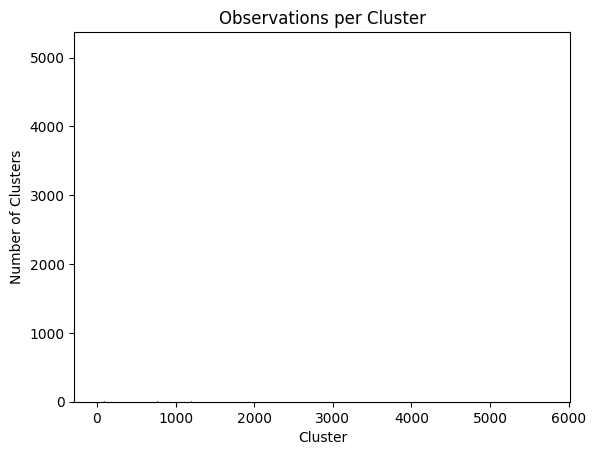

In [45]:
# obtain the numbers for each cluster
cluster_counts = sm_hash['cluster'].value_counts()
print(cluster_counts)
# plot 
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Clusters')
plt.title('Observations per Cluster')
plt.show()

In [126]:
import multiprocessing

num_process = 28

def process_file(file_name):
    status, output = subprocess.getstatusoutput('fastcdc -mi 256 -s 512 -ma 1024 ' + file_name)
    output = output.split('\n')
    results = []
    for line in output:
        temp = line.split(' ')
        temp_hash = temp[0].split('=')[-1]
        temp_offset = temp[1].split('=')[-1]
        temp_size = temp[2].split('=')[-1]
        results.append([file_name, temp_hash, temp_size])
    return results

# modify get_reduce_ration
def get_reduce_ration(fastcdc_df):
    fastcdc_df['size'] = fastcdc_df['size'].astype(int)

    hash_total_size = fastcdc_df.groupby('hash')['size'].sum()

    hash_counts = fastcdc_df['hash'].value_counts()

    reduced_size = (hash_total_size - fastcdc_df.drop_duplicates('hash').set_index('hash')['size']).sum()

    total_size = hash_total_size.sum()

    print(f"reduce size is {reduced_size}")
    print(f"all size is {total_size}")
    return reduced_size, total_size

def get_cluster(cluster_id):
    fastcdc_list = []
    cluster_files = sm_hash[sm_hash['cluster'] == cluster_id]['file name'].tolist()

    with multiprocessing.Pool(processes=num_process) as pool:
        results = pool.map(process_file, cluster_files)
        for result in results:
            fastcdc_list.extend(result)

    fastcdc_df = pd.DataFrame(fastcdc_list, columns=['file name', 'hash', 'size'])
    return fastcdc_df


all_cluster_size = []
all_cluster_reducesize = []

for cluster_id in range(cluster_num):
    if cluster_id == -1:
        continue
    print(f"cluster:{cluster_id}")
    temp_df = get_cluster(cluster_id)
    temp_reduce, temp_all = get_reduce_ration(temp_df)
    print(f"cluster:{cluster_id}, reduced size:{temp_reduce}, cluster total size: {temp_all}")
    all_cluster_size.append(temp_all)
    all_cluster_reducesize.append(temp_reduce)

total = sum(all_cluster_size)
total_reduce = sum(all_cluster_reducesize)

print("{} {} {}".format(total_reduce, total, total_reduce * 1.0 / total))

cluster:0
reduce size is 3213564310
all size is 5276043129
cluster:0, reduced size:3213564310, cluster total size: 5276043129
cluster:1
reduce size is 0
all size is 524288
cluster:1, reduced size:0, cluster total size: 524288
cluster:2
reduce size is 0
all size is 524288
cluster:2, reduced size:0, cluster total size: 524288
cluster:3
reduce size is 1048926
all size is 1573389
cluster:3, reduced size:1048926, cluster total size: 1573389
cluster:4
reduce size is 10487580
all size is 11011959
cluster:4, reduced size:10487580, cluster total size: 11011959
cluster:5
reduce size is 0
all size is 524288
cluster:5, reduced size:0, cluster total size: 524288
cluster:6
reduce size is 151592
all size is 524288
cluster:6, reduced size:151592, cluster total size: 524288
cluster:7
reduce size is 0
all size is 524451
cluster:7, reduced size:0, cluster total size: 524451
cluster:8
reduce size is 0
all size is 524473
cluster:8, reduced size:0, cluster total size: 524473
cluster:9
reduce size is 0
all s

In [127]:
3365557969/1024/1024/1024

3.134420112706721

# KMeans

In [17]:
from sklearn.cluster import KMeans

hash_values = sm_hash['semantic hash'].apply(lambda x: x.detach().numpy())
hash_values = list(hash_values)
cluster_num = 100
kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(hash_values)

sm_hash['cluster'] = kmeans.labels_

print(sm_hash['cluster'])

/home/gpu2/miniconda3/envs/sunt_torch2.1.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0        6
1       97
2       17
3       93
4       15
        ..
3528    73
3529    56
3530    98
3531    68
3532    66
Name: cluster, Length: 3533, dtype: int32


In [10]:
sm_hash.to_pickle('./sm_hash(partial_data_ubuntu)_cluster.pkl')

In [4]:
sm_hash = pd.read_pickle('./sm_hash(uncompressed_data_ubuntu)_cluster.pkl')
sm_hash

,file name,semantic hash,cluster
0,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",7
1,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",9
2,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(1.), tensor(-1.), tensor(...",7
3,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(-1.), tensor(1.), tensor(...",4
4,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(1.), tensor(-1.), tensor(...",5
...,...,...,...
6652,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",0
6653,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",0
6654,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(1.), tensor(-1.), tensor(...",7
6655,/home/gpu2/sunt/Docker_dedup/连续版本motivation/un...,"[tensor(-1.), tensor(1.), tensor(-1.), tensor(...",7


cluster
86    90
17    87
30    83
56    78
35    74
      ..
82     6
80     5
88     5
95     4
70     3
Name: count, Length: 100, dtype: int64


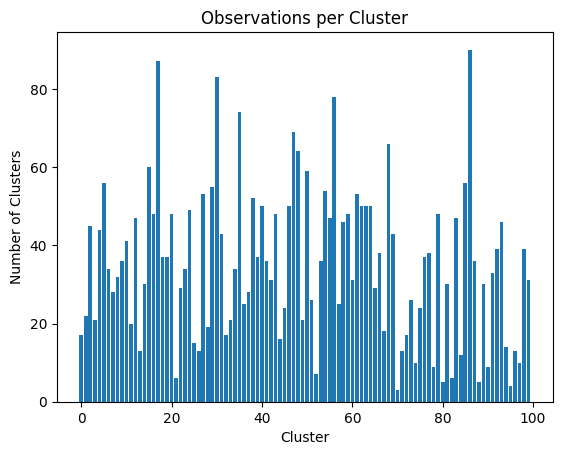

In [18]:
# obtain numbers for each clusters
cluster_counts = sm_hash['cluster'].value_counts()
print(cluster_counts)
# plot
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Clusters')
plt.title('Observations per Cluster')
plt.show()

In [19]:

list_cluster_num = []
for i in range(cluster_num):
    list_cluster_num.append(0)
for i in range(cluster_num):
    list_cluster_num[cluster_counts.index[i]] = cluster_counts.values[i]

<Axes: ylabel='Proportion'>

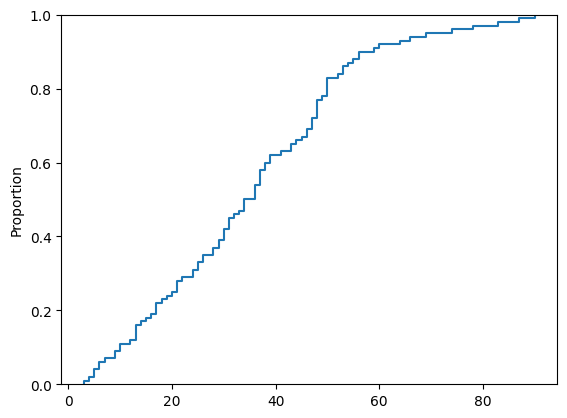

In [20]:
sns.ecdfplot(cluster_counts.values)

In [18]:
# for i in range(sm_hash.shape[0]):
#     if sm_hash.iloc[i].at['cluster'] == 0:
#         print(f'file name of cluster{1}: {sm_hash.iloc[i].at["file name"]}')

fastcdc_list = [[],[],[]]

for i in range(sm_hash.shape[0]):
    if sm_hash.iloc[i].at['cluster'] == 0:
        status, output = subprocess.getstatusoutput('fastcdc -mi 256 -s 512 -ma 1024 ' + sm_hash.iloc[i].at["file name"])
        output = output.split('\n')
        for j in range(len(output)):
            temp = output[j].split(' ')
            temp_hash = temp[0].split('=')[-1]
            temp_offset = temp[1].split('=')[-1]
            temp_size = temp[2].split('=')[-1]
            fastcdc_list[0].append(sm_hash.iloc[i].at["file name"])
            fastcdc_list[1].append(temp_hash)
            fastcdc_list[2].append(temp_size)
        print(i, end='\r')

fastcdc_df=DataFrame(fastcdc_list)
fastcdc_df = fastcdc_df.T
fastcdc_df.rename(columns={0:'file name', 1:'hash', 2:'size'},inplace=True)
    

In [22]:
import multiprocessing

num_process = 28

def process_file(file_name):
    status, output = subprocess.getstatusoutput('fastcdc -mi 256 -s 512 -ma 1024 ' + file_name)
    output = output.split('\n')
    results = []
    for line in output:
        temp = line.split(' ')
        temp_hash = temp[0].split('=')[-1]
        temp_offset = temp[1].split('=')[-1]
        temp_size = temp[2].split('=')[-1]
        results.append([file_name, temp_hash, temp_size])
    return results

# modify get_reduce_ration
def get_reduce_ration(fastcdc_df):
    fastcdc_df['size'] = fastcdc_df['size'].astype(int)

    hash_total_size = fastcdc_df.groupby('hash')['size'].sum()


    hash_counts = fastcdc_df['hash'].value_counts()

    reduced_size = (hash_total_size - fastcdc_df.drop_duplicates('hash').set_index('hash')['size']).sum()

    total_size = hash_total_size.sum()

    print(f"reduce size is {reduced_size}")
    print(f"all size is {total_size}")
    return reduced_size, total_size

def get_cluster(cluster_id):
    fastcdc_list = []
    cluster_files = sm_hash[sm_hash['cluster'] == cluster_id]['file name'].tolist()

    with multiprocessing.Pool(processes=num_process) as pool:
        results = pool.map(process_file, cluster_files)
        for result in results:
            fastcdc_list.extend(result)

    fastcdc_df = pd.DataFrame(fastcdc_list, columns=['file name', 'hash', 'size'])
    return fastcdc_df


all_cluster_size = []
all_cluster_reducesize = []

for cluster_id in range(cluster_num):
    print(f"cluster:{cluster_id}")
    temp_df = get_cluster(cluster_id)
    temp_reduce, temp_all = get_reduce_ration(temp_df)
    print(f"cluster:{cluster_id}, reduced size:{temp_reduce}, cluster total size: {temp_all}")
    all_cluster_size.append(temp_all)
    all_cluster_reducesize.append(temp_reduce)

total = sum(all_cluster_size)
total_reduce = sum(all_cluster_reducesize)

print("{} {} {}".format(total_reduce, total, total_reduce * 1.0 / total))

cluster:0
reduce size is 6581151
all size is 8913856
cluster:0, reduced size:6581151, cluster total size: 8913856
cluster:1
reduce size is 4685118
all size is 11536351
cluster:1, reduced size:4685118, cluster total size: 11536351
cluster:2
reduce size is 15858156
all size is 23595830
cluster:2, reduced size:15858156, cluster total size: 23595830
cluster:3
reduce size is 5741634
all size is 11012511
cluster:3, reduced size:5741634, cluster total size: 11012511
cluster:4
reduce size is 20105515
all size is 23072465
cluster:4, reduced size:20105515, cluster total size: 23072465
cluster:5
reduce size is 16935904
all size is 29363060
cluster:5, reduced size:16935904, cluster total size: 29363060
cluster:6
reduce size is 10191396
all size is 17827281
cluster:6, reduced size:10191396, cluster total size: 17827281
cluster:7
reduce size is 7188622
all size is 14681831
cluster:7, reduced size:7188622, cluster total size: 14681831
cluster:8
reduce size is 12492266
all size is 16779677
cluster:8, 

### 多线程

In [16]:
print(f'total size {total/1024/1024/1024}uce, total_reduce: {total_reduce/1024/1024/1024}, remain: {(total-total_reduce)/1024/1024/1024}')

total size 1.725308582186699uce, total_reduce: 1.1439482159912586, remain: 0.5813603661954403


# Optimal method

One key for all subchunks

In [96]:
sm_hash.shape

(8493, 3)

In [97]:
import multiprocessing
import pandas as pd
from pandas import DataFrame
import subprocess

def get_cluster_partial(sm_hash_slice, process_id, total_per_process):
    log_file = f'./log/process_{process_id}_log.txt'  # create a log file for each process
    fastcdc_list = [[], [], []]
    with open(log_file, 'w') as f:
        for i, row in enumerate(sm_hash_slice.iterrows()):
            status, output = subprocess.getstatusoutput('fastcdc -mi 256 -s 512 -ma 1024 ' + sm_hash_slice.iloc[i].at["file name"])
            output = output.split('\n')
            if len(output) > 0:
                for j in range(len(output)):
                    temp = output[j].split(' ')
                    if len(temp) > 0:
                        temp_hash = temp[0].split('=')[-1]
                        temp_offset = temp[1].split('=')[-1]
                        temp_size = temp[2].split('=')[-1]
                        fastcdc_list[0].append(sm_hash_slice.iloc[i].at["file name"])
                        fastcdc_list[1].append(temp_hash)
                        fastcdc_list[2].append(temp_size)
                        
                    else:
                        print(sm_hash_slice.iloc[i].at["file name"])
                        print(output)
                        print(temp)
            else:
                print(output)
            f.write(f'Process {process_id}: {i + 1}/{total_per_process}\n')
            f.flush()

    fastcdc_df = DataFrame(fastcdc_list).T
    fastcdc_df.rename(columns={0: 'file name', 1: 'hash', 2: 'size'}, inplace=True)
    print('finish!')
    return fastcdc_df

def parallel_process(sm_hash, num_splits):
    # split sm_hash
    split_data = np.array_split(sm_hash, num_splits)
    
    with multiprocessing.Pool(processes=num_splits) as pool:
        # create a task list
        tasks = [(data, i+1, len(data)) for i, data in enumerate(split_data)]
        results = pool.starmap(get_cluster_partial, tasks)

    return results


# processing parallel
num_splits = 30
clusters_data = parallel_process(sm_hash, num_splits)

total_fastcdc_df = pd.concat(clusters_data, ignore_index=True)
# total_fastcdc_df.to_pickle('./264GB完全解压最优_fastcdc_df.pkl')

/home/gpu2/miniconda3/envs/sunt_torch2.1.1/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!
finish!


In [128]:
total_fastcdc_df.describe()

,file name,hash,size
count,8800529,8800529,8800529
unique,8493,1955932,769
top,./partial_data_syd_512KiB/56_8ad8b3f87b378cfae...,5f70bf18a086007016e948b04aed3b82103a36bea41755...,1024
freq,1353,91860,539377


In [129]:
def get_reduce_ration(fastcdc_df):
    reduced_size = 0
    all_size = 0
    temp = fastcdc_df['hash'].value_counts()
    temp_list = temp.index.values
    dic_hash2num ={}
    dic_hash2size = {}
    for i in range(len(temp)):  
        dic_hash2num[temp_list[i]] = 0
    for i in range(len(fastcdc_df)):
        dic_hash2num[fastcdc_df.iloc[i].at["hash"]] += 1
        dic_hash2size [fastcdc_df.iloc[i].at["hash"]] = fastcdc_df.iloc[i].at["size"]
        print(i, end='\r')
    for k in dic_hash2num.keys():
        val = dic_hash2num[k]
        reduced_size  += int(dic_hash2size[k]) * (val-1)
        all_size += int(dic_hash2size[k]) * val
    print("reduced size is {}".format(reduced_size/1024/1024/1024))
    print("all size is {}".format(all_size/1024/1024/1024))
    print("remained size is {}".format((all_size - reduced_size)/1024/1024/1024))
    return reduced_size,all_size

results = get_reduce_ration(total_fastcdc_df)

reduced size is 3.2261005714535713
all size is 4.147476029582322
remained size is 0.9213754581287503
